In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as seabornInstance
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
%matplotlib inline

In [4]:
dataset = pd.read_csv('./data/weather.csv')

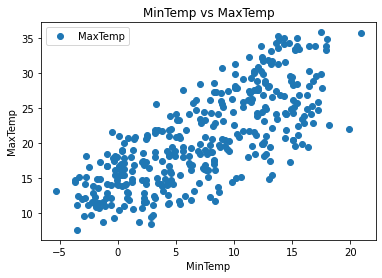

In [5]:
dataset.plot(x='MinTemp', y='MaxTemp', style='o')
plt.title('MinTemp vs MaxTemp')
plt.xlabel('MinTemp')
plt.ylabel('MaxTemp')
plt.show()

In [7]:
x = dataset['MinTemp'].values.reshape(-1,1)
y = dataset['MaxTemp'].values.reshape(-1,1)

In [8]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

In [9]:
regressor = LinearRegression()
regressor.fit(x_train, y_train)

LinearRegression()

In [11]:
y_pred = regressor.predict(x_test)
df = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted':y_pred.flatten()})
df

,Actual,Predicted
0,18.0,17.238165
1,19.4,28.432518
2,11.6,16.474914
3,11.6,13.421909
4,17.6,21.563256
...,...,...
69,30.2,24.955484
70,11.7,19.019085
71,26.1,21.224033
72,30.9,24.785873


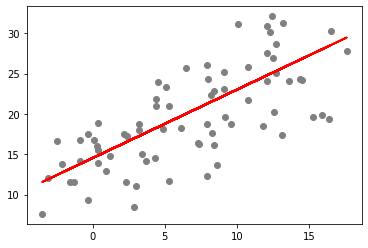

In [12]:
plt.scatter(x_test, y_test, color='gray')
plt.plot(x_test, y_pred, color='red', linewidth=2)
plt.show()

In [13]:
print('평균제곱법MSE', metrics.mean_squared_error(y_test, y_pred))
print('루트 평균 제곱법RMSE', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

평균제곱법 18.29141637646577
루트 평균 제곱법 4.276846545816879


In [14]:
#1. 평균제곱법(Mean Square Error) MSE
#모델의 예측값과 실제값 차이의 면적의 합, 제곱을 하므로 특이값 존재시 값이 크게 영향 받음
metrics.mean_squared_error(y_test, y_pred)

18.29141637646577

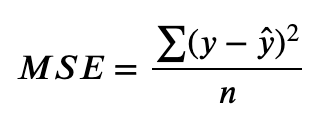

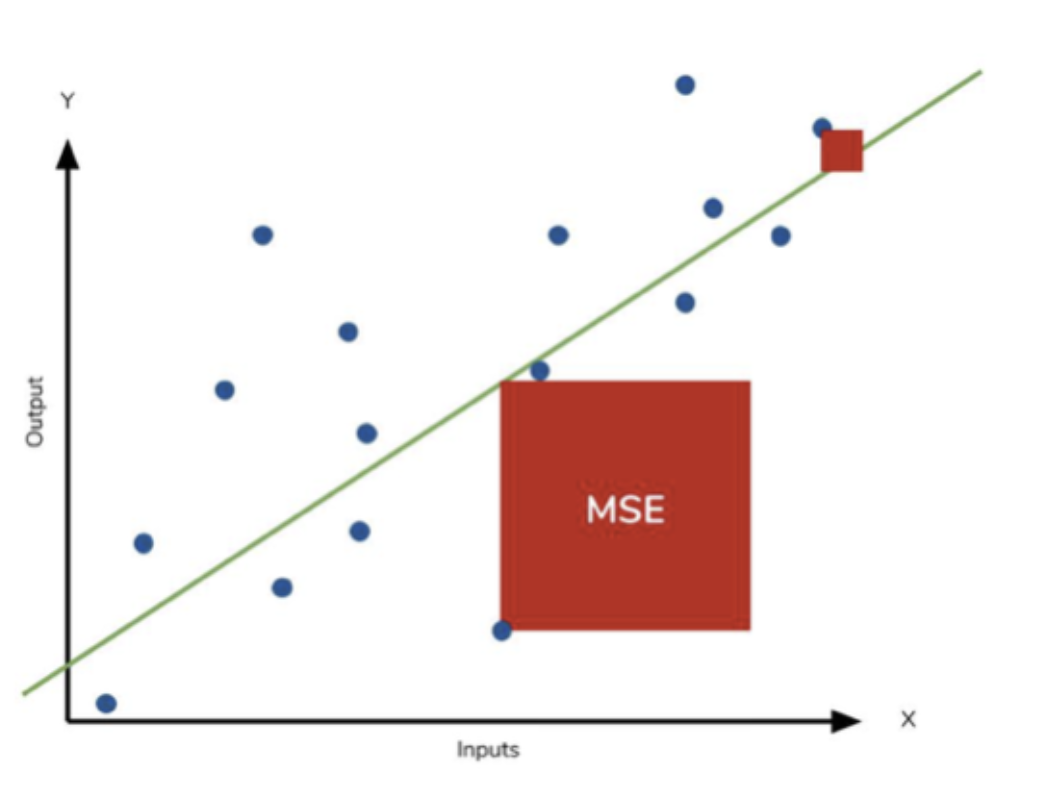

In [16]:
#2. 평균제곱법 RMSE(Root Mean Square Error)
#제곱에 루트를 취한 값으로 실제 값과 비슷한 단위로 변환하여 해석이 쉬움
np.sqrt(metrics.mean_squared_error(y_test, y_pred))

4.276846545816879

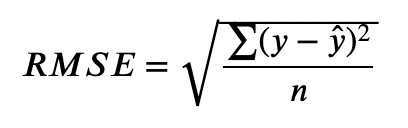

In [18]:
#3. MAE(Mean Absolute Error): 모델의 예측값과 실제값의 차이를 모두 더한다는 개념
# MSE 보다 특이치에 robust함(이상치/에러값으로 부터 영향을 크게 받지 않음)
# 절대값을 취하기 때문에 모델의 underperformance, overperformance 여부 알 수 없음
np.mean(np.abs((y_test - y_pred)))

3.523379380458077

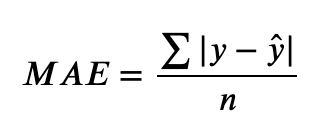

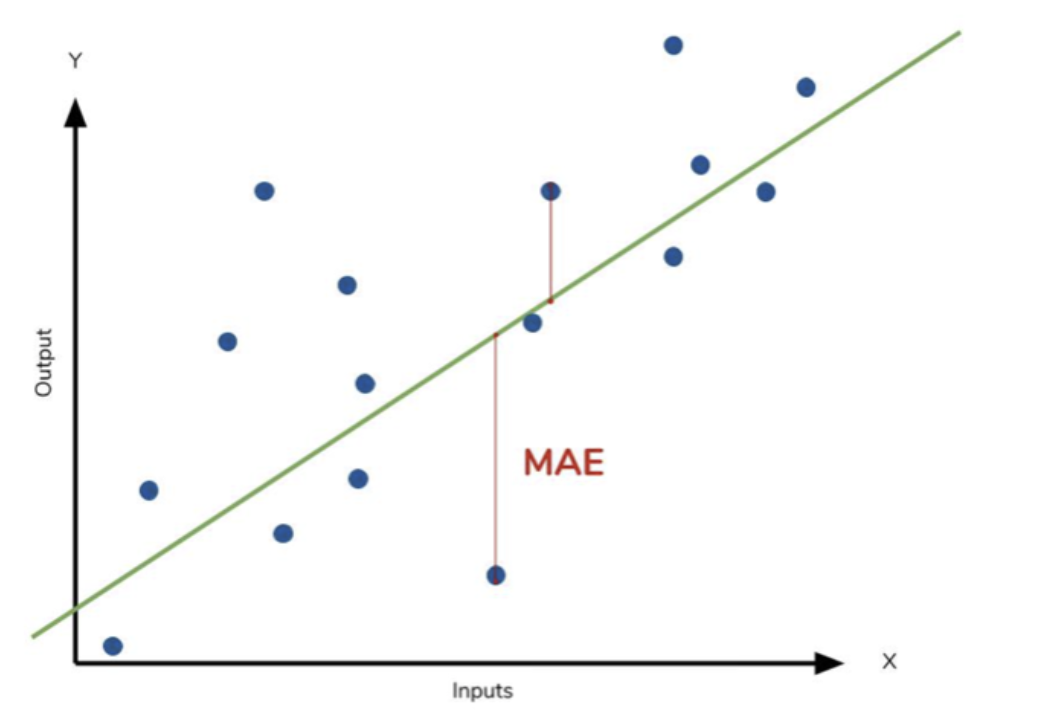

In [19]:
#4. MAPE: MAE를 퍼센트로 변환한 것(Mean Absolute Percentage Error)
#MSE보다 특이치에 robust함
#모델에 대한 편향이 존재하므로 MPE 함께 확인하는게 좋음
#0 근처의 값에서는 사용하기 어려움
np.mean(np.abs((y_test - y_pred) / y_test)) * 100

20.53589132579729

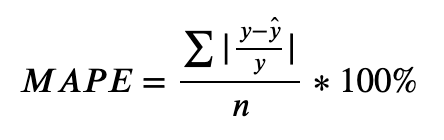

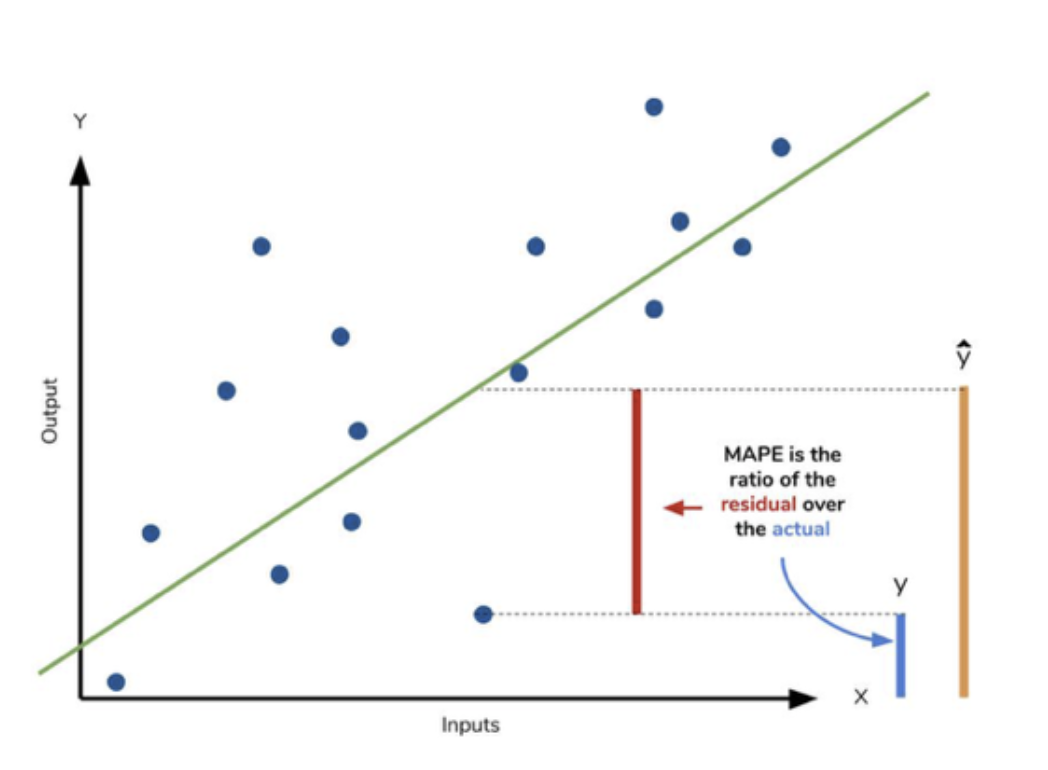

In [20]:
#5. MPE: MAPE에서 절대값을 제외한 지표(Mean Percentage Error)
#모델의 underperformance, overperformance 여부 판단 가능
#MPE<0: 모델 overperformance,  MPE>0: 모델 underperformance
np.mean((y_test - y_pred) / y_test) * 100

-8.506517047404785

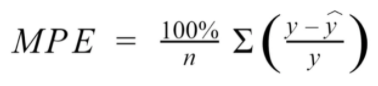

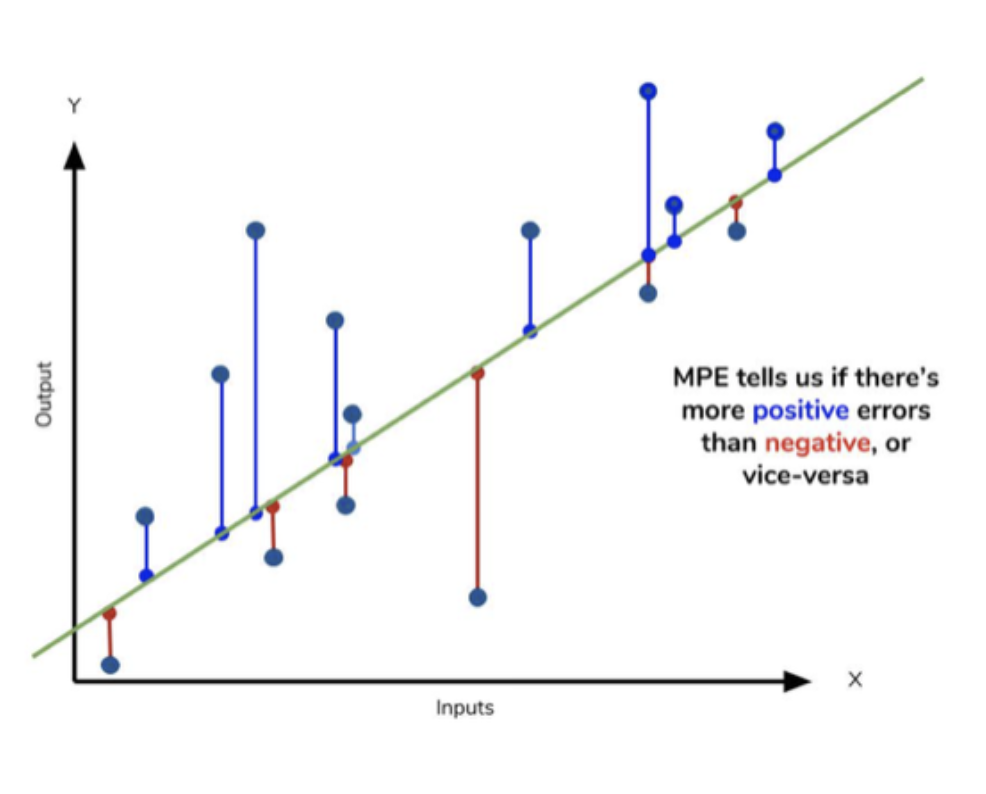